In [60]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random


## Loading data

In [61]:
X_train = np.loadtxt('train_X.csv', delimiter=',')
Y_train = np.loadtxt('train_label.csv', delimiter=',')
X_test = np.loadtxt('test_X.csv', delimiter=',')
Y_test = np.loadtxt('test_label.csv', delimiter=',')

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (1000, 784)
Shape of Y_train: (1000, 10)
Shape of X_test: (350, 784)
Shape of Y_test: (350, 10)


## Visualizing a random sample

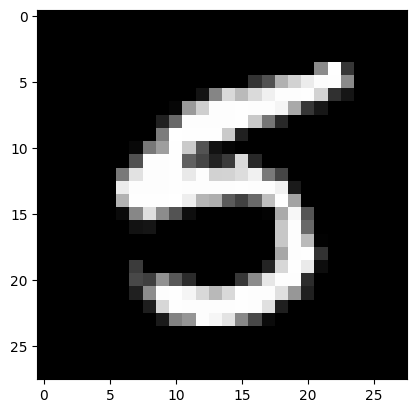

In [62]:
index = random.randrange(0, X_train.shape[0])
plt.imshow(X_train[index].reshape((28, 28)), cmap='gray')
plt.show()

## Activation functions

In [63]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x - np.max(x)) # Subtracting max(x) for numerical stability
    return expX / np.sum(expX, axis=0, keepdims=True)

## Initialize parameters

In [64]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(0)
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }
    return parameters

## Forward propagation

In [65]:
def forward_propagation(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    forward_outputs = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    return forward_outputs

## Cost function

In [66]:
def cost_function(a2, y):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(np.nan_to_num(y * np.log(a2))) # Using np.nan_to_num to handle NaN values
    return cost


## Backward propagation

In [67]:
def backward_propagation(x, y, parameters, forward_outputs):
    w1 = parameters['w1']
    w2 = parameters['w2']
    a1 = forward_outputs['a1']
    a2 = forward_outputs['a2']
    m = x.shape[1]
    dz2 = (a2 - y)
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * (a1 > 0) # ReLU derivative
    dw1 = (1 / m) * np.dot(dz1, x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    gradients = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }
    return gradients

## Update parameters

In [68]:
def update_parameters(parameters, gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }
    return parameters

## Model

In [69]:
def model(x, y, n_h, learning_rate, iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]
    cost_list = []
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(iterations):
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['a2'], y)
        gradients = backward_propagation(x, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)
        if i % (iterations / 10) == 0:
            print("Cost after", i, "iterations is:", cost)
    return parameters, cost_list


Parameters

In [70]:
iterations = 100
n_h = 1000
learning_rate = 0.001

## Training the model

In [71]:
Parameters, Cost_list = model(X_train.T, Y_train.T, n_h, learning_rate, iterations)

Cost after 0 iterations is: 9.709250252918498
Cost after 10 iterations is: 0.41753077371369085
Cost after 20 iterations is: 0.17587366053706796
Cost after 30 iterations is: 0.09688153669154119
Cost after 40 iterations is: 0.06134823624826943
Cost after 50 iterations is: 0.044239620105938335
Cost after 60 iterations is: 0.034885886937154456
Cost after 70 iterations is: 0.028901580464840065
Cost after 80 iterations is: 0.024707602394292663
Cost after 90 iterations is: 0.02159133225988365


##  Plotting the cost

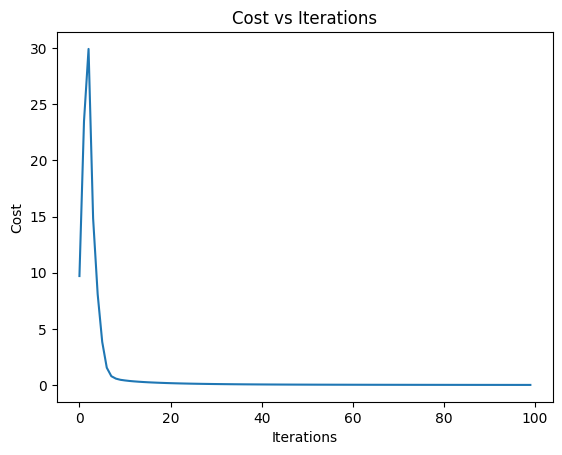

In [72]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


Accuracy function

In [73]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']
    a_out = np.argmax(a_out, axis=0)
    labels = np.argmax(labels, axis=0)
    acc = np.mean(a_out == labels) * 100
    return acc


Evaluating accuracy on train and test datasets

In [74]:
print("Accuracy of Train Dataset:", accuracy(X_train.T, Y_train.T, Parameters), "%")
print("Accuracy of Test Dataset:", round(accuracy(X_test.T, Y_test.T, Parameters), 2), "%")


Accuracy of Train Dataset: 100.0 %
Accuracy of Test Dataset: 85.14 %


Visualizing a random sample from test dataset

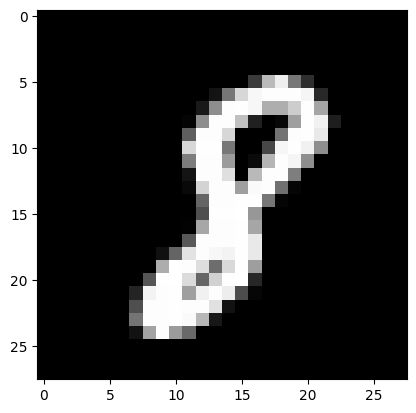

In [75]:
idx = random.randrange(0, X_test.shape[0])
plt.imshow(X_test[idx].reshape((28, 28)), cmap='gray')
plt.show()


Making predictions

In [76]:
cache = forward_propagation(X_test[idx].reshape(X_test[idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, axis=0)
print("Our model says it is:", a_pred[0])


Our model says it is: 8
